In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from netCDF4 import Dataset,date2num, num2date
import os
import netCDF4
import xarray as xr
import cartopy.crs as ccrs
import scipy
from sklearn_som.som import SOM

%matplotlib inline

In [2]:
from utils import plot_composites, fit_and_plot #local helperfunctions

In [3]:
HOME = "/scistor/ivm/the410"
os.chdir(f"{HOME}/GolfVijf")
from GolfVijf.utils import trendfit_robust, onelag_cov, covariance_timeseries2, data_for_pcolormesh
from GolfVijf.processing import load_and_subset_data, compute_trend_pattern, DDdata_txt_to_timeseries, remove_spatmean_variability



In [4]:
os.chdir(HOME)

# Load in data and preprocess 

In [ ]:
# even trend plots maken 

In [114]:
var = "STREAM250" #"T2M" #"STREAM250"
longname =  "Streamfunction 250 hpa" #"Streamfunction 250 hpa" "2m surface temperature"
preprocessing = "all" #"all", 'interannual_only', 'seasonality_only'"
unit = "m2/s" #"degrees C"

In [115]:
daJJA = load_and_subset_data(variable = var, months = [6,7,8], subdomain = 'midlat', ndays = 1)
daJJA.attrs["long_name"]= longname

In [82]:
daJJA_removed_seasonality = remove_spatmean_variability(daJJA, how=preprocessing)

In [87]:
daJJA_1940_1979 = daJJA_removed_seasonality.sel(time=daJJA_removed_seasonality.time.dt.year<1979)
daJJA_1979_2023 = daJJA_removed_seasonality.sel(time=daJJA_removed_seasonality.time.dt.year>=1979)

In [89]:
daJJA_1940_1979.attrs["units"]=unit
daJJA_1979_2023.attrs["units"]=unit
daJJA_removed_seasonality.attrs["units"]=unit

In [90]:
daJJA_None_1940_trend = compute_trend_pattern(daJJA_1940_1979)
daJJA_1979_None_trend = compute_trend_pattern(daJJA_1979_2023)

In [93]:
daJJA_all = compute_trend_pattern(daJJA_removed_seasonality)

In [117]:
daJJA_raw_trend = compute_trend_pattern(daJJA)

In [95]:
# Determining locations and consistent color coding
sf_extreme_locs =[(58,-150),(42,-125),(41,-86),(56,-60),(52,-20),(47,3),(52,30),(39.5,65),(45,100),(38,177)] # lat, lon
geocolor = ['orange'] * 4 + ['green'] * 5 + ['black'] # us, europe, other
geosty = ['solid','dotted','dashed','dashdot','solid','dotted','dashed','dashdot',(0,(5,1)),'solid']
geoclass = {loc:{'color':color,'linestyle':sty} for loc, color, sty in zip(sf_extreme_locs, geocolor, geosty)}

# This is the indicator dictionary that says for the entire notebook whether to look at highs or lows
sf_extreme_positive = {(lat,lon) : bool(daJJA_all.sel(latitude = lat, longitude = lon, method = 'nearest') > 60000) for lat, lon in sf_extreme_locs}

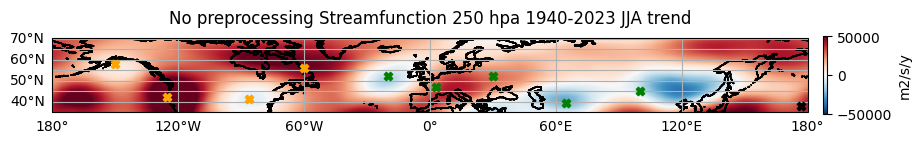

In [120]:
data=daJJA_raw_trend
year_str="1940-2023"

######
shading = 'flat'
vmin, vmax = -50000, 50000
cmap = 'RdBu_r'
fig, ax = plt.subplots(figsize = (10,4), subplot_kw={'projection':ccrs.PlateCarree()})
im = ax.pcolormesh(*data_for_pcolormesh(data, shading = shading),transform = ccrs.PlateCarree(),
                        shading = shading, cmap = cmap, vmin = vmin, vmax = vmax)


for lat, lon in sf_extreme_locs:
    marker = 'o' if sf_extreme_positive[(lat,lon)] else 'X'
    ax.scatter(lon, lat, color = geoclass[(lat,lon)]['color'],zorder = 10, marker = marker)
    ax.coastlines()
ax.set_title(f'No preprocessing {longname} {year_str} JJA trend')
ax.gridlines(draw_labels = ['left','bottom'])
fig.colorbar(im, ax=ax, fraction=0.005, pad=0.02, label=f"{unit}/y")

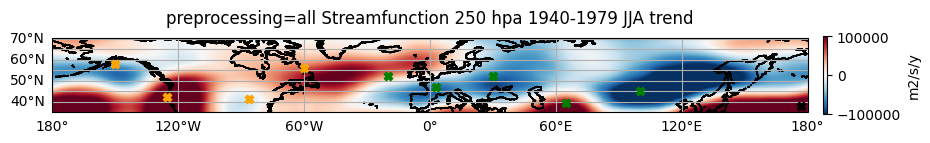

In [109]:
data=daJJA_None_1940_trend
year_str="1940-1979"

######
shading = 'flat'
vmin, vmax = -100000, 100000
cmap = 'RdBu_r'
fig, ax = plt.subplots(figsize = (10,4), subplot_kw={'projection':ccrs.PlateCarree()})
im = ax.pcolormesh(*data_for_pcolormesh(data, shading = shading),transform = ccrs.PlateCarree(),
                        shading = shading, cmap = cmap, vmin = vmin, vmax = vmax)


for lat, lon in sf_extreme_locs:
    marker = 'o' if sf_extreme_positive[(lat,lon)] else 'X'
    ax.scatter(lon, lat, color = geoclass[(lat,lon)]['color'],zorder = 10, marker = marker)
    ax.coastlines()
ax.set_title(f'preprocessing={preprocessing} {longname} {year_str} JJA trend')
ax.gridlines(draw_labels = ['left','bottom'])
fig.colorbar(im, ax=ax, fraction=0.005, pad=0.02, label=f"{unit}/y")

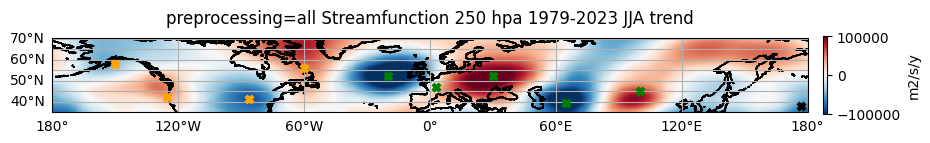

In [112]:
data=daJJA_1979_None_trend
year_str="1979-2023"

######
shading = 'flat'
vmin, vmax = -100000, 100000
cmap = 'RdBu_r'
fig, ax = plt.subplots(figsize = (10,4), subplot_kw={'projection':ccrs.PlateCarree()})
im = ax.pcolormesh(*data_for_pcolormesh(data, shading = shading),transform = ccrs.PlateCarree(),
                        shading = shading, cmap = cmap, vmin = vmin, vmax = vmax)


for lat, lon in sf_extreme_locs:
    marker = 'o' if sf_extreme_positive[(lat,lon)] else 'X'
    ax.scatter(lon, lat, color = geoclass[(lat,lon)]['color'],zorder = 10, marker = marker)
    ax.coastlines()
ax.set_title(f'preprocessing={preprocessing} {longname} {year_str} JJA trend')
ax.gridlines(draw_labels = ['left','bottom'])
fig.colorbar(im, ax=ax, fraction=0.005, pad=0.02, label=f"{unit}/y")

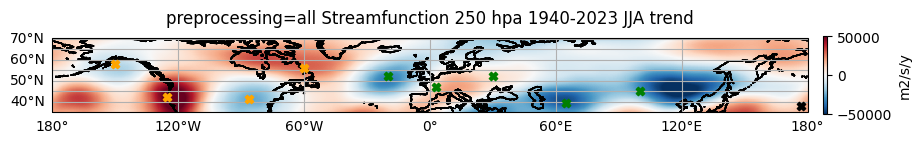

In [113]:
data=daJJA_all
year_str="1940-2023"

######
shading = 'flat'
vmin, vmax = -50000, 50000
cmap = 'RdBu_r'
fig, ax = plt.subplots(figsize = (10,4), subplot_kw={'projection':ccrs.PlateCarree()})
im = ax.pcolormesh(*data_for_pcolormesh(data, shading = shading),transform = ccrs.PlateCarree(),
                        shading = shading, cmap = cmap, vmin = vmin, vmax = vmax)


for lat, lon in sf_extreme_locs:
    marker = 'o' if sf_extreme_positive[(lat,lon)] else 'X'
    ax.scatter(lon, lat, color = geoclass[(lat,lon)]['color'],zorder = 10, marker = marker)
    ax.coastlines()
ax.set_title(f'preprocessing={preprocessing} {longname} {year_str} JJA trend')
ax.gridlines(draw_labels = ['left','bottom'])
fig.colorbar(im, ax=ax, fraction=0.005, pad=0.02, label=f"{unit}/y")

## Var of choice

In [5]:
var = "STREAM250" #"T2M" #"STREAM250"
longname =  "Streamfunction 250 hpa" #"Streamfunction 250 hpa" "2m surface temperature"
preprocessing = "seasonality_only" #"all", 'interannual_only', 'seasonality_only'"
unit = "m2/s" #"degrees C"

In [6]:
daJJA = load_and_subset_data(variable = var, months = [6,7,8], subdomain = 'midlat', ndays = 1)
daJJA.attrs["long_name"]= longname

/scistor/ivm/the410/test_tensorflow3/lib/python3.9/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/scistor/ivm/the410/test_tensorflow3/lib/python3.9/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/scistor/ivm/the410/test_tensorflow3/lib/python3.9/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/scistor/ivm/the410/test_tensorflow3/lib/python3.9/site-packages/xarray/core/accessor_dt.py:132: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a 

In [7]:
midlatmean = daJJA.mean(['latitude','longitude']) #daily midlat mean
seas_midlatmean = midlatmean.groupby(midlatmean.time.dt.year).mean()#.to_pandas() #yearly midlat mean

KeyboardInterrupt: 

/scistor/ivm/the410/test_tensorflow3/lib/python3.9/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


Text(0.5, 1.0, 'Averages of streamfunction 250hPa over midlats NH')

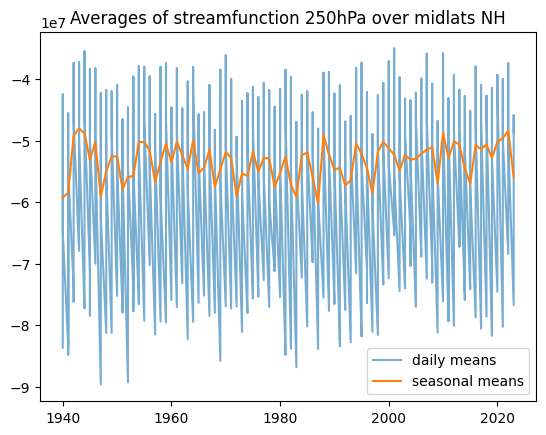

In [8]:
plt.plot(midlatmean.time.dt.year[:], midlatmean[:], label="daily means", alpha=0.6)
plt.plot(seas_midlatmean.year[:], seas_midlatmean[:], label="seasonal means")

plt.legend()
plt.title(f"Averages of {longname} over midlats NH")

In [7]:
daJJA_removed_seasonality = remove_spatmean_variability(daJJA, how=preprocessing)

/scistor/ivm/the410/test_tensorflow3/lib/python3.9/site-packages/xarray/core/accessor_dt.py:418: FutureWarning: dt.weekofyear and dt.week have been deprecated. Please use dt.isocalendar().week instead.
  warnings.warn(
/scistor/ivm/the410/test_tensorflow3/lib/python3.9/site-packages/xarray/core/accessor_dt.py:418: FutureWarning: dt.weekofyear and dt.week have been deprecated. Please use dt.isocalendar().week instead.
  warnings.warn(


## Now load in ENSO data 

In [8]:
# different sst values\
enso = pd.read_csv("/scistor/ivm/the410/WAVE5/enso_index_3monthly_3.4.csv", delimiter=';')

In [9]:
enso

Year  DJF  JFM  FMA  MAM  AMJ  MJJ  JJA  JAS  ASO  SON  OND  NDJ
0   1950 -1.5 -1.3 -1.2 -1.2 -1.1 -0.9 -0.5 -0.4 -0.4 -0.4 -0.6 -0.8
1   1951 -0.8 -0.5 -0.2  0.2  0.4  0.6  0.7  0.9  1.0  1.2  1.0  0.8
2   1952  0.5  0.4  0.3  0.3  0.2  0.0 -0.1  0.0  0.2  0.1  0.0  0.1
3   1953  0.4  0.6  0.6  0.7  0.8  0.8  0.7  0.7  0.8  0.8  0.8  0.8
4   1954  0.8  0.5  0.0 -0.4 -0.5 -0.5 -0.6 -0.8 -0.9 -0.8 -0.7 -0.7
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
69  2019  0.7  0.7  0.7  0.7  0.5  0.5  0.3  0.1  0.2  0.3  0.5  0.5
70  2020  0.5  0.5  0.4  0.2 -0.1 -0.3 -0.4 -0.6 -0.9 -1.2 -1.3 -1.2
71  2021 -1.0 -0.9 -0.8 -0.7 -0.5 -0.4 -0.4 -0.5 -0.7 -0.8 -1.0 -1.0
72  2022 -1.0 -0.9 -1.0 -1.1 -1.0 -0.9 -0.8 -0.9 -1.0 -1.0 -0.9 -0.8
73  2023 -0.7 -0.4 -0.1  0.2  0.5  0.8  1.1  1.3  1.6  1.8  1.9  2.0

[74 rows x 13 columns]

In [10]:
enso_months = "DJF" # 'DJF' "JJA"
enso_data = enso[enso_months].values #or any other month 

In [13]:
# The following two cells can be used to catagorize the data 

## transitional means from DJF in current year to DJF in following year, 
#with DJF of following year determining the enso state

# to save the indices of the days
enso_bins_indices = {"neutral": [],
             "La Nina persist": [], 
             "La Nina transitional": [], 
             "El Nino persist": [], 
             "El Nino transitional": []}


In [14]:
#For each day in the dataset, append to the enso_bin depending on the year value
data = daJJA_removed_seasonality.sel(time = daJJA_removed_seasonality.time.dt.year>=1950) #1950 onwards only
data = data.sel(time = data.time.dt.year<2023) #don't have this value yet...

#To split up the data in before and after 1979 
#data = data.sel(time = data.time.dt.year>=1979) 

#som_counts = np.zeros((k,np.unique(data.time.dt.year).shape[0]))
years = np.unique(data.time.dt.year)

for i in range(data.shape[0]): #iterate over the days 
    
    year = int(data.time.dt.year[i]) #int of year
    year_indice = np.where(years==year)[0] #get indice of corresponding year 
    
    #now add to enso_bin_array
    if enso_data[year_indice] > -0.5 and enso_data[year_indice] < 0.5:
        #"neutral year"
        enso_bins_indices["neutral"].append(i)
        
    elif enso_data[year_indice+1] < -0.5 and enso_data[year_indice] < -0.5:
        #"la nina persistent "
        enso_bins_indices["La Nina persist"].append(i)
        
    elif enso_data[year_indice+1] < -0.5 and enso_data[year_indice] >= -0.5:
        #"la nina transition "
        enso_bins_indices["La Nina transitional"].append(i)
        
    elif enso_data[year_indice+1] > 0.5 and enso_data[year_indice] > 0.5:
        #"el nino persistent "
        enso_bins_indices["El Nino persist"].append(i)
        
    elif enso_data[year_indice+1] > 0.5 and enso_data[year_indice] <= 0.5:
        #"el nino transition "
        enso_bins_indices["El Nino transitional"].append(i)        

# Create composites of NH var for each enso bin

In [84]:
# to get grid points anomalies 
grid_mean = np.nanmean(data, axis=0)
data_to_plot = data - grid_mean
data_to_plot.attrs["unit"] = unit

In [85]:
def plot_enso_state(enso_state, data_to_plot):
    enso_composite = np.nanmean(data_to_plot[enso_bins_indices[enso_state]], axis=0)
    n = len(enso_bins_indices[enso_state])
    plot_composites(enso_composite, data_to_plot.longitude, data_to_plot.latitude,
                title=f"preprocessing={preprocessing} {longname} composite of {enso_state} {enso_months} with n={n}", 
                    deseasonalized=True, unit=data_to_plot.attrs["unit"])

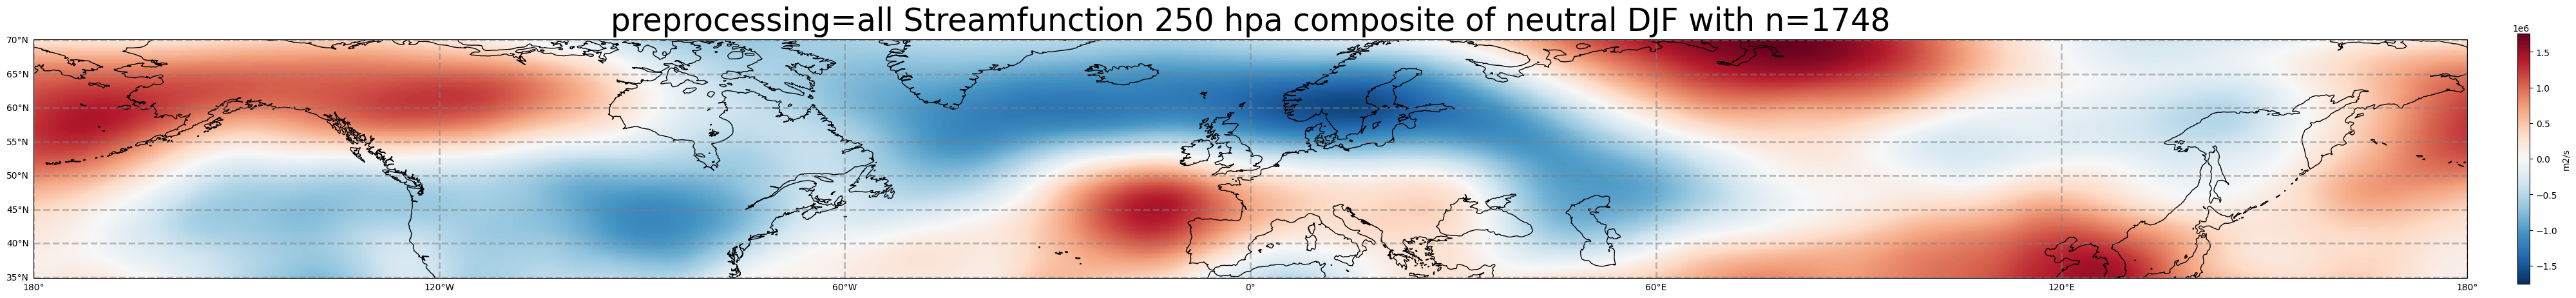

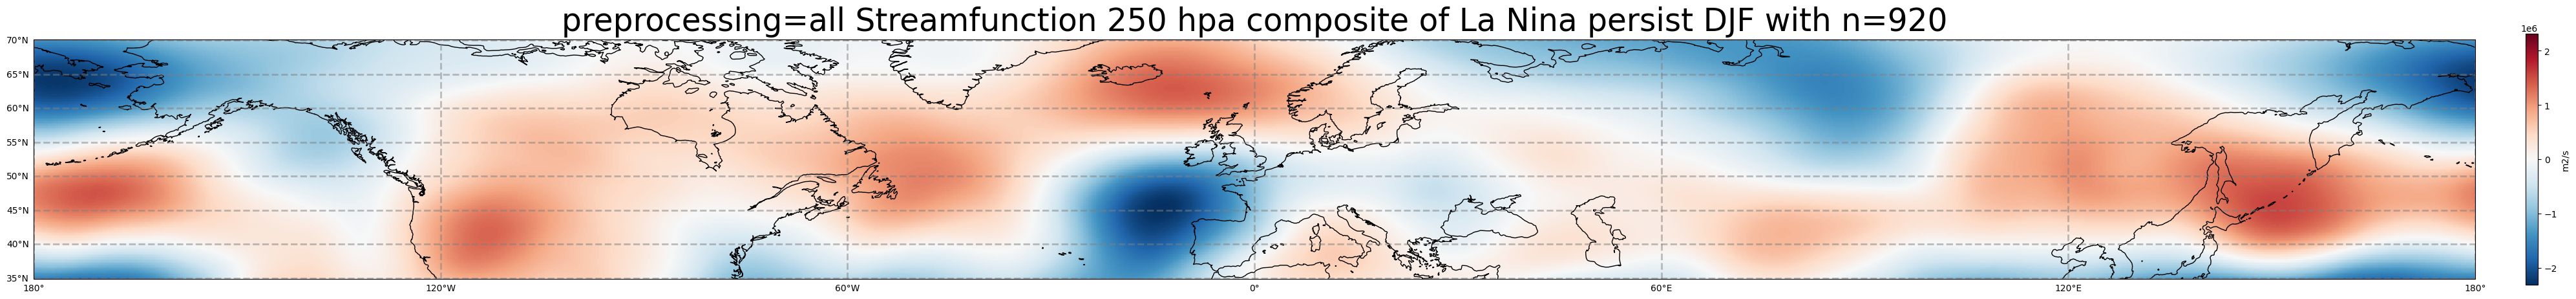

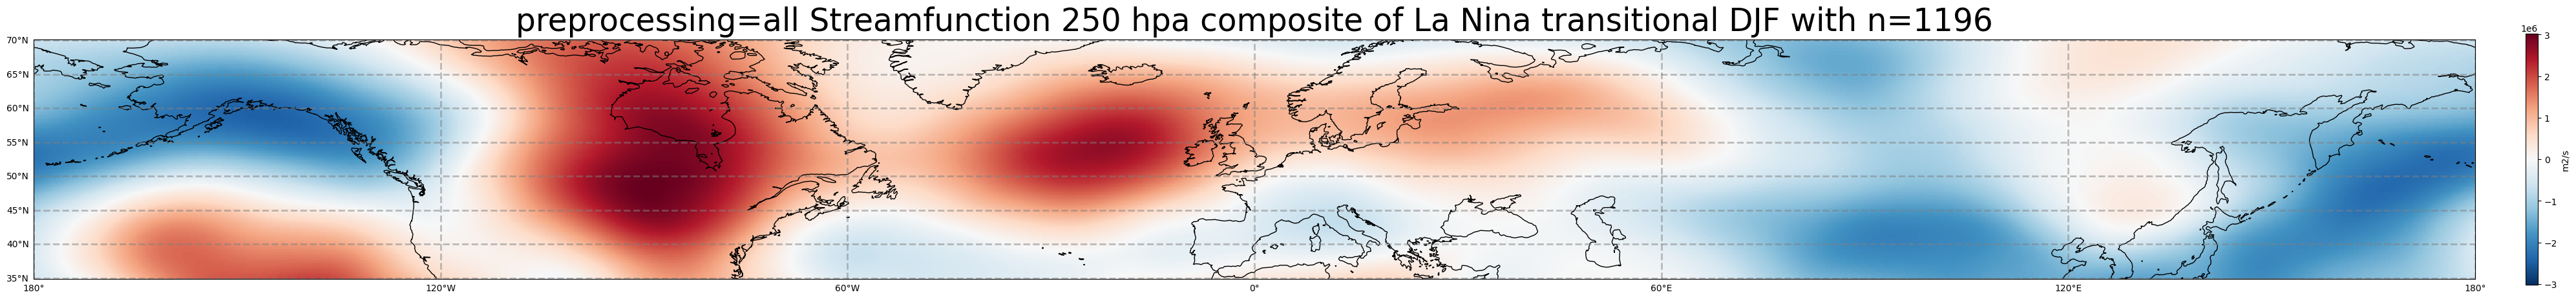

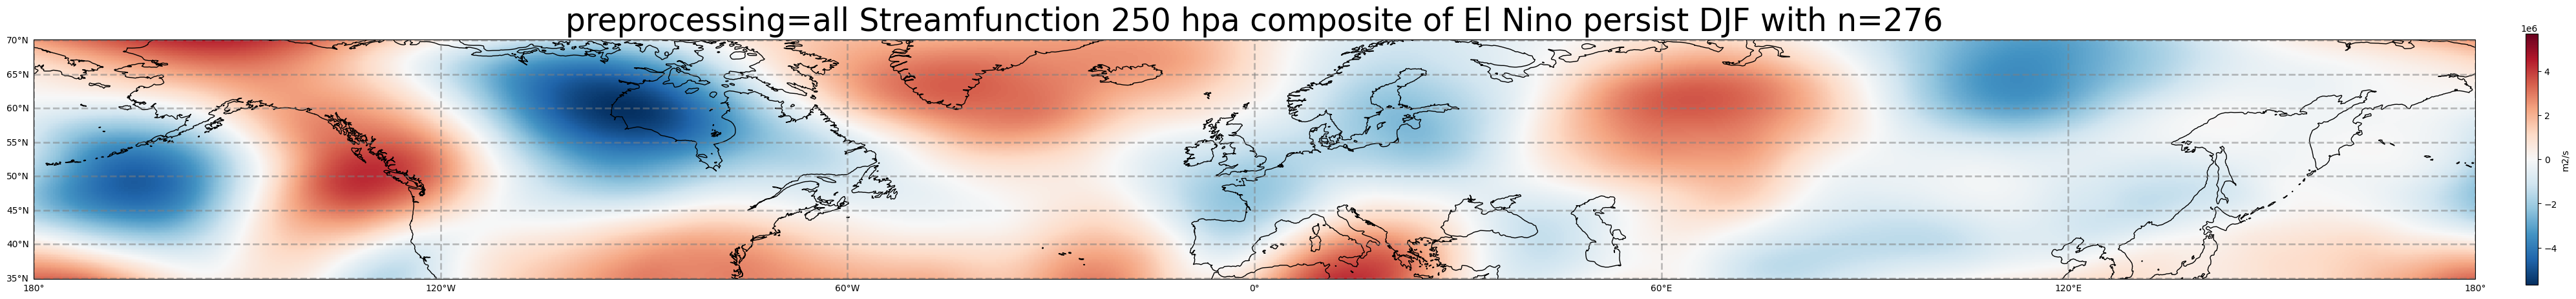

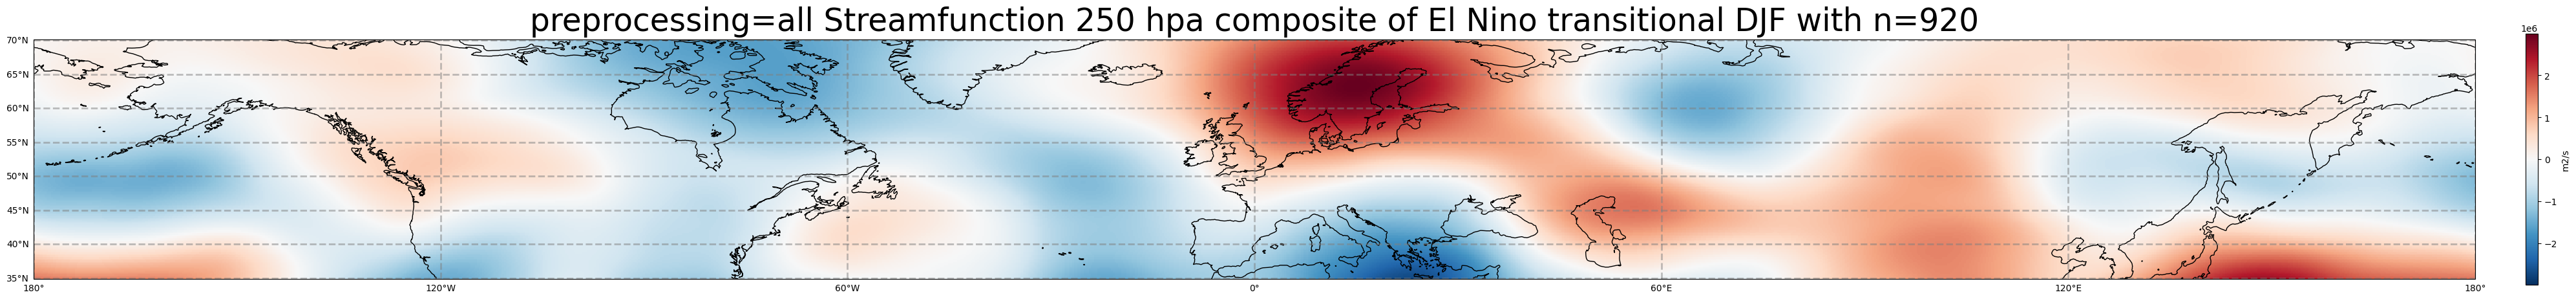

In [44]:
for enso_state in enso_bins_indices.keys():
    import warnings
    warnings.filterwarnings("ignore")
    plot_enso_state(enso_state, data_to_plot)

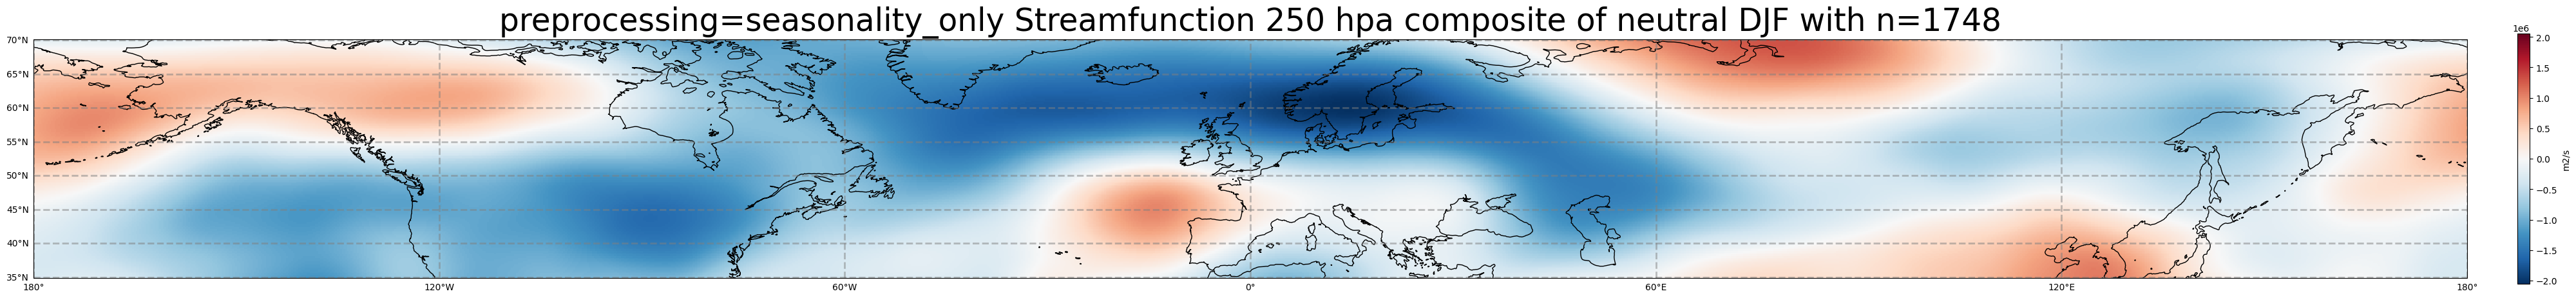

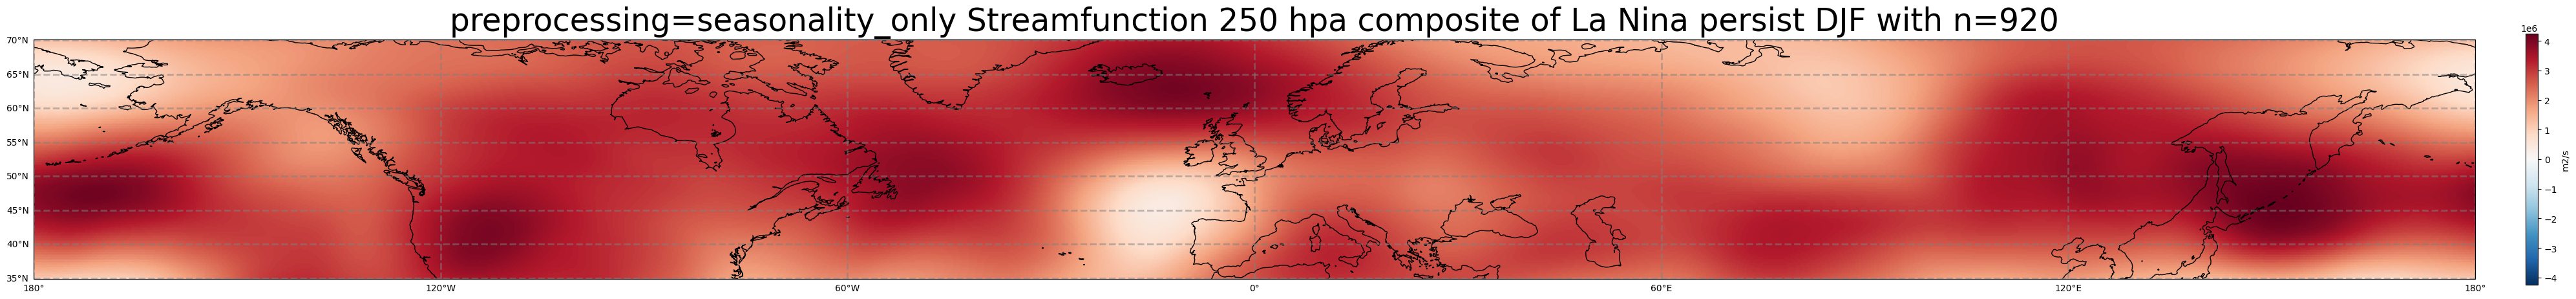

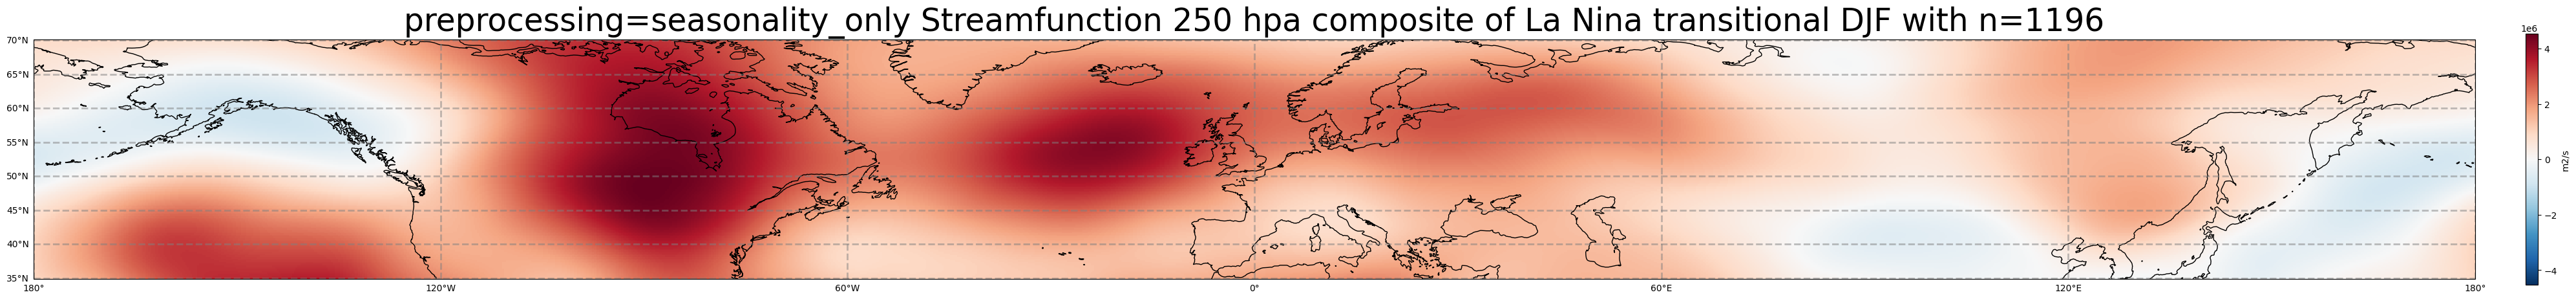

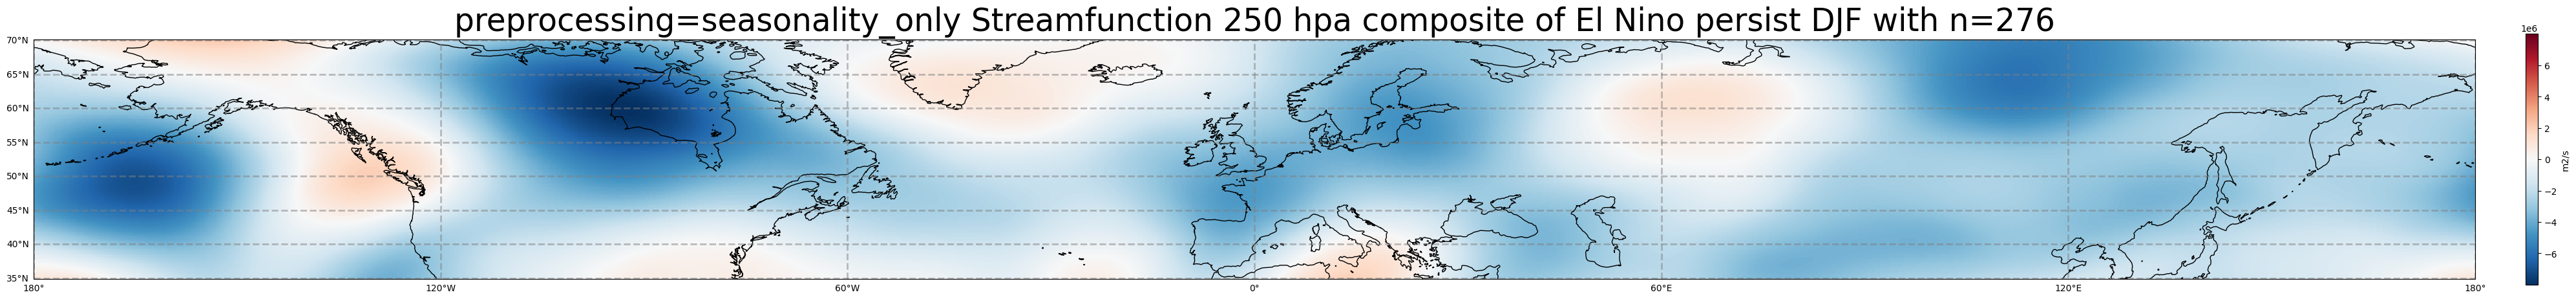

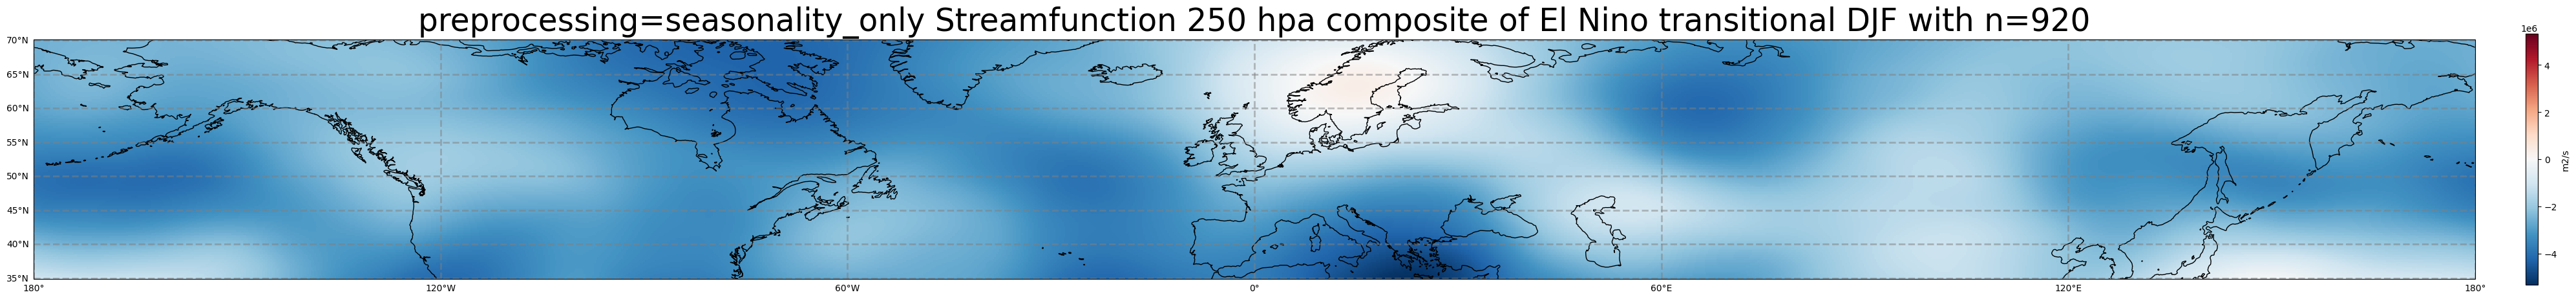

In [38]:
for enso_state in enso_bins_indices.keys():
    import warnings
    warnings.filterwarnings("ignore")
    plot_enso_state(enso_state, data_to_plot)

## How does the trend pattern look like for subsets of ENSO ?

In [66]:
data = daJJA_removed_seasonality.sel(time = daJJA_removed_seasonality.time.dt.year>=1950) #1950 onwards only
data = data.sel(time = data.time.dt.year<2023) #don't have this value yet...

/scistor/ivm/the410/test_tensorflow3/lib/python3.9/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


In [15]:
enso_bins_indices.keys()

dict_keys(['neutral', 'La Nina persist', 'La Nina transitional', 'El Nino persist', 'El Nino transitional'])

In [45]:
ENSO_to_include = ['neutral', "La Nina persist", 'La Nina transitional']


##
indices = []

for enso_state in ENSO_to_include:
    for i in enso_bins_indices[enso_state]:
        indices.append(i)

1748
2668
3864


In [36]:
def fit_trends_per_gridpoint(var_array):


    #now calculate the trend per gridpoint
    midlats_yearly_trend_per_gridpoint = np.zeros((var_array.shape[1], var_array.shape[2])) #out array, empty
    y = var_array.values
    x = np.arange(0, var_array.time.shape[0], 1)
    for i in range(var_array.shape[1]):
        for j in range(var_array.shape[2]):
            #iterate over each gridpoint, calculate yearly trend, and save this in array
            #print(x.shape, stream_midlats_year.shape)
            idx = np.isfinite(x)
            midlats_yearly_trend_per_gridpoint[i,j] = np.polyfit(x[idx],y[:,i,j],1)[0] 

    return midlats_yearly_trend_per_gridpoint

In [ ]:
subset = data[indices]    

In [37]:
trend = fit_trends_per_gridpoint(subset)

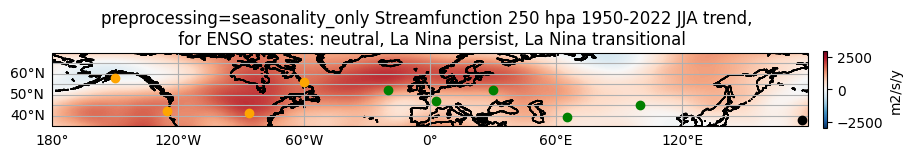

In [60]:
data=trend
year_str="1950-2022"

######
# Determining locations and consistent color coding
sf_extreme_locs =[(58,-150),(42,-125),(41,-86),(56,-60),(52,-20),(47,3),(52,30),(39.5,65),(45,100),(38,177)] # lat, lon
shading = 'flat'
vmin, vmax = -3000, 3000
cmap = 'RdBu_r'
fig, ax = plt.subplots(figsize = (10,4), subplot_kw={'projection':ccrs.PlateCarree()})
im = ax.pcolormesh(subset.longitude, subset.latitude, trend[:-1, :-1],transform = ccrs.PlateCarree(),
                        shading = shading, cmap = cmap, vmin = vmin, vmax = vmax)


for lat, lon in sf_extreme_locs:
    marker = 'o' #if sf_extreme_positive[(lat,lon)] else 'X'
    ax.scatter(lon, lat, color = geoclass[(lat,lon)]['color'],zorder = 10, marker = marker)
    ax.coastlines()
    
enso_str = ', '.join(ENSO_to_include)    
ax.set_title(f'preprocessing={preprocessing} {longname} {year_str} JJA trend, \n for ENSO states: {enso_str}')
ax.gridlines(draw_labels = ['left','bottom'])
fig.colorbar(im, ax=ax, fraction=0.005, pad=0.02, label=f"{unit}/y")

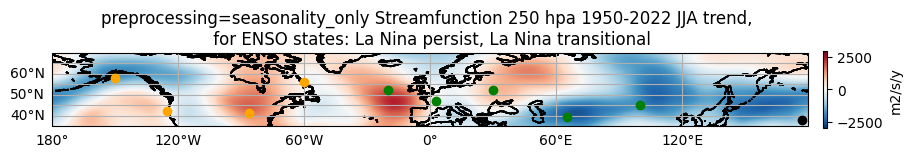

In [65]:
ENSO_to_include = ["La Nina persist", 'La Nina transitional']


##
indices = []

for enso_state in ENSO_to_include:
    for i in enso_bins_indices[enso_state]:
        indices.append(i)
        
        
subset = data[indices]    
trend = fit_trends_per_gridpoint(subset)

year_str="1950-2022"

######
# Determining locations and consistent color coding
sf_extreme_locs =[(58,-150),(42,-125),(41,-86),(56,-60),(52,-20),(47,3),(52,30),(39.5,65),(45,100),(38,177)] # lat, lon
shading = 'flat'
vmin, vmax = -3000, 3000
cmap = 'RdBu_r'
fig, ax = plt.subplots(figsize = (10,4), subplot_kw={'projection':ccrs.PlateCarree()})
im = ax.pcolormesh(subset.longitude, subset.latitude, trend[:-1, :-1],transform = ccrs.PlateCarree(),
                        shading = shading, cmap = cmap, vmin = vmin, vmax = vmax)


for lat, lon in sf_extreme_locs:
    marker = 'o' #if sf_extreme_positive[(lat,lon)] else 'X'
    ax.scatter(lon, lat, color = geoclass[(lat,lon)]['color'],zorder = 10, marker = marker)
    ax.coastlines()
    
enso_str = ', '.join(ENSO_to_include)    
ax.set_title(f'preprocessing={preprocessing} {longname} {year_str} JJA trend, \n for ENSO states: {enso_str}')
ax.gridlines(draw_labels = ['left','bottom'])
fig.colorbar(im, ax=ax, fraction=0.005, pad=0.02, label=f"{unit}/y")

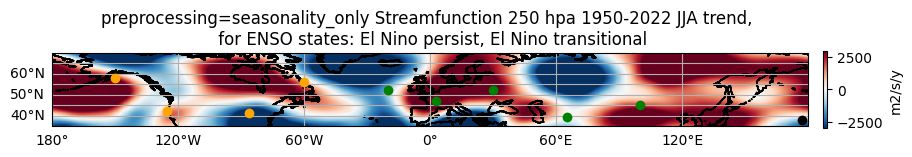

In [67]:
ENSO_to_include = ['El Nino persist', 'El Nino transitional']


##
indices = []

for enso_state in ENSO_to_include:
    for i in enso_bins_indices[enso_state]:
        indices.append(i)
        
        
subset = data[indices]    
trend = fit_trends_per_gridpoint(subset)

year_str="1950-2022"

######
# Determining locations and consistent color coding
sf_extreme_locs =[(58,-150),(42,-125),(41,-86),(56,-60),(52,-20),(47,3),(52,30),(39.5,65),(45,100),(38,177)] # lat, lon
shading = 'flat'
vmin, vmax = -3000, 3000
cmap = 'RdBu_r'
fig, ax = plt.subplots(figsize = (10,4), subplot_kw={'projection':ccrs.PlateCarree()})
im = ax.pcolormesh(subset.longitude, subset.latitude, trend[:-1, :-1],transform = ccrs.PlateCarree(),
                        shading = shading, cmap = cmap, vmin = vmin, vmax = vmax)


for lat, lon in sf_extreme_locs:
    marker = 'o' #if sf_extreme_positive[(lat,lon)] else 'X'
    ax.scatter(lon, lat, color = geoclass[(lat,lon)]['color'],zorder = 10, marker = marker)
    ax.coastlines()
    
enso_str = ', '.join(ENSO_to_include)    
ax.set_title(f'preprocessing={preprocessing} {longname} {year_str} JJA trend, \n for ENSO states: {enso_str}')
ax.gridlines(draw_labels = ['left','bottom'])
fig.colorbar(im, ax=ax, fraction=0.005, pad=0.02, label=f"{unit}/y")

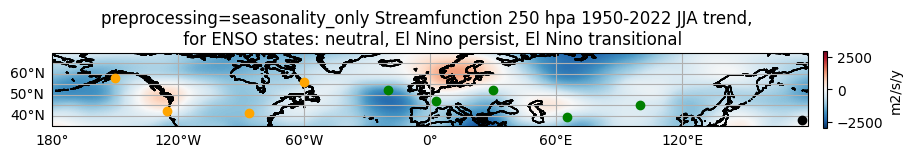

In [68]:
ENSO_to_include = ['neutral', 'El Nino persist', 'El Nino transitional']


##
indices = []

for enso_state in ENSO_to_include:
    for i in enso_bins_indices[enso_state]:
        indices.append(i)
        
        
subset = data[indices]    
trend = fit_trends_per_gridpoint(subset)

year_str="1950-2022"

######
# Determining locations and consistent color coding
sf_extreme_locs =[(58,-150),(42,-125),(41,-86),(56,-60),(52,-20),(47,3),(52,30),(39.5,65),(45,100),(38,177)] # lat, lon
shading = 'flat'
vmin, vmax = -3000, 3000
cmap = 'RdBu_r'
fig, ax = plt.subplots(figsize = (10,4), subplot_kw={'projection':ccrs.PlateCarree()})
im = ax.pcolormesh(subset.longitude, subset.latitude, trend[:-1, :-1],transform = ccrs.PlateCarree(),
                        shading = shading, cmap = cmap, vmin = vmin, vmax = vmax)


for lat, lon in sf_extreme_locs:
    marker = 'o' #if sf_extreme_positive[(lat,lon)] else 'X'
    ax.scatter(lon, lat, color = geoclass[(lat,lon)]['color'],zorder = 10, marker = marker)
    ax.coastlines()
    
enso_str = ', '.join(ENSO_to_include)    
ax.set_title(f'preprocessing={preprocessing} {longname} {year_str} JJA trend, \n for ENSO states: {enso_str}')
ax.gridlines(draw_labels = ['left','bottom'])
fig.colorbar(im, ax=ax, fraction=0.005, pad=0.02, label=f"{unit}/y")

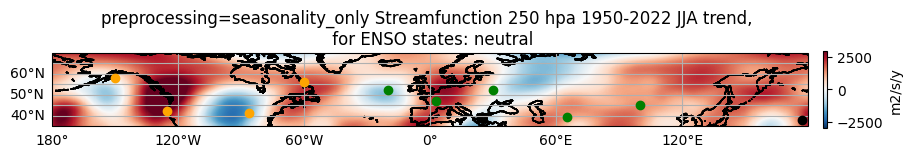

In [69]:
ENSO_to_include = ['neutral']


##
indices = []

for enso_state in ENSO_to_include:
    for i in enso_bins_indices[enso_state]:
        indices.append(i)
        
        
subset = data[indices]    
trend = fit_trends_per_gridpoint(subset)

year_str="1950-2022"

######
# Determining locations and consistent color coding
sf_extreme_locs =[(58,-150),(42,-125),(41,-86),(56,-60),(52,-20),(47,3),(52,30),(39.5,65),(45,100),(38,177)] # lat, lon
shading = 'flat'
vmin, vmax = -3000, 3000
cmap = 'RdBu_r'
fig, ax = plt.subplots(figsize = (10,4), subplot_kw={'projection':ccrs.PlateCarree()})
im = ax.pcolormesh(subset.longitude, subset.latitude, trend[:-1, :-1],transform = ccrs.PlateCarree(),
                        shading = shading, cmap = cmap, vmin = vmin, vmax = vmax)


for lat, lon in sf_extreme_locs:
    marker = 'o' #if sf_extreme_positive[(lat,lon)] else 'X'
    ax.scatter(lon, lat, color = geoclass[(lat,lon)]['color'],zorder = 10, marker = marker)
    ax.coastlines()
    
enso_str = ', '.join(ENSO_to_include)    
ax.set_title(f'preprocessing={preprocessing} {longname} {year_str} JJA trend, \n for ENSO states: {enso_str}')
ax.gridlines(draw_labels = ['left','bottom'])
fig.colorbar(im, ax=ax, fraction=0.005, pad=0.02, label=f"{unit}/y")

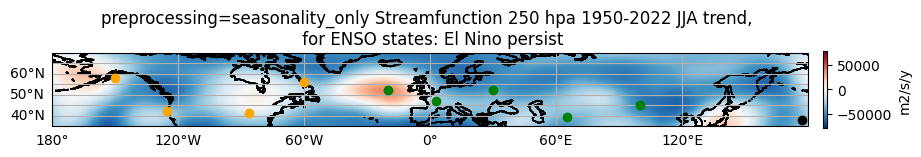

In [87]:
ENSO_to_include = ["El Nino persist"]


##
indices = []

for enso_state in ENSO_to_include:
    for i in enso_bins_indices[enso_state]:
        indices.append(i)
        
        
subset = data[indices]    
trend = fit_trends_per_gridpoint(subset)

year_str="1950-2022"

######
# Determining locations and consistent color coding
sf_extreme_locs =[(58,-150),(42,-125),(41,-86),(56,-60),(52,-20),(47,3),(52,30),(39.5,65),(45,100),(38,177)] # lat, lon
shading = 'flat'
vmin, vmax = -80000, 80000
cmap = 'RdBu_r'
fig, ax = plt.subplots(figsize = (10,4), subplot_kw={'projection':ccrs.PlateCarree()})
im = ax.pcolormesh(subset.longitude, subset.latitude, trend[:-1, :-1],transform = ccrs.PlateCarree(),
                        shading = shading, cmap = cmap, vmin = vmin, vmax = vmax)


for lat, lon in sf_extreme_locs:
    marker = 'o' #if sf_extreme_positive[(lat,lon)] else 'X'
    ax.scatter(lon, lat, color = geoclass[(lat,lon)]['color'],zorder = 10, marker = marker)
    ax.coastlines()
    
enso_str = ', '.join(ENSO_to_include)    
ax.set_title(f'preprocessing={preprocessing} {longname} {year_str} JJA trend, \n for ENSO states: {enso_str}')
ax.gridlines(draw_labels = ['left','bottom'])
fig.colorbar(im, ax=ax, fraction=0.005, pad=0.02, label=f"{unit}/y")

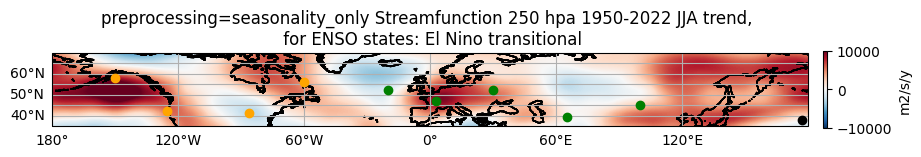

In [85]:
ENSO_to_include = ["El Nino transitional"]


##
indices = []

for enso_state in ENSO_to_include:
    for i in enso_bins_indices[enso_state]:
        indices.append(i)
        
        
subset = data[indices]    
trend = fit_trends_per_gridpoint(subset)

year_str="1950-2022"

######
# Determining locations and consistent color coding
sf_extreme_locs =[(58,-150),(42,-125),(41,-86),(56,-60),(52,-20),(47,3),(52,30),(39.5,65),(45,100),(38,177)] # lat, lon
shading = 'flat'
vmin, vmax = -10000, 10000
cmap = 'RdBu_r'
fig, ax = plt.subplots(figsize = (10,4), subplot_kw={'projection':ccrs.PlateCarree()})
im = ax.pcolormesh(subset.longitude, subset.latitude, trend[:-1, :-1],transform = ccrs.PlateCarree(),
                        shading = shading, cmap = cmap, vmin = vmin, vmax = vmax)


for lat, lon in sf_extreme_locs:
    marker = 'o' #if sf_extreme_positive[(lat,lon)] else 'X'
    ax.scatter(lon, lat, color = geoclass[(lat,lon)]['color'],zorder = 10, marker = marker)
    ax.coastlines()
    
enso_str = ', '.join(ENSO_to_include)    
ax.set_title(f'preprocessing={preprocessing} {longname} {year_str} JJA trend, \n for ENSO states: {enso_str}')
ax.gridlines(draw_labels = ['left','bottom'])
fig.colorbar(im, ax=ax, fraction=0.005, pad=0.02, label=f"{unit}/y")

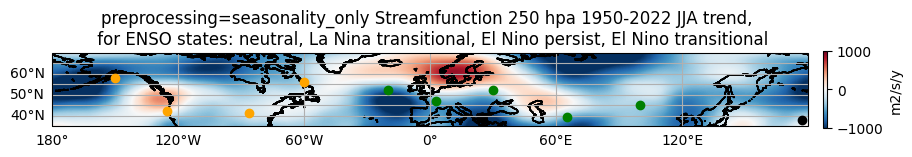

In [95]:
ENSO_to_include = ['neutral', 'La Nina transitional', 'El Nino persist', 'El Nino transitional']


##
indices = []

for enso_state in ENSO_to_include:
    for i in enso_bins_indices[enso_state]:
        indices.append(i)
        
        
subset = data[indices]    
trend = fit_trends_per_gridpoint(subset)

year_str="1950-2022"

######
# Determining locations and consistent color coding
sf_extreme_locs =[(58,-150),(42,-125),(41,-86),(56,-60),(52,-20),(47,3),(52,30),(39.5,65),(45,100),(38,177)] # lat, lon
shading = 'flat'
vmin, vmax = -1000, 1000
cmap = 'RdBu_r'
fig, ax = plt.subplots(figsize = (10,4), subplot_kw={'projection':ccrs.PlateCarree()})
im = ax.pcolormesh(subset.longitude, subset.latitude, trend[:-1, :-1],transform = ccrs.PlateCarree(),
                        shading = shading, cmap = cmap, vmin = vmin, vmax = vmax)


for lat, lon in sf_extreme_locs:
    marker = 'o' #if sf_extreme_positive[(lat,lon)] else 'X'
    ax.scatter(lon, lat, color = geoclass[(lat,lon)]['color'],zorder = 10, marker = marker)
    ax.coastlines()
    
enso_str = ', '.join(ENSO_to_include)    
ax.set_title(f'preprocessing={preprocessing} {longname} {year_str} JJA trend, \n for ENSO states: {enso_str}')
ax.gridlines(draw_labels = ['left','bottom'])
fig.colorbar(im, ax=ax, fraction=0.005, pad=0.02, label=f"{unit}/y")